In [143]:
# Dependencies and Setup
import base64
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import base64
from requests.auth import HTTPBasicAuth
import scipy.stats as st
from pprint import pprint
import seaborn as sns
%matplotlib inline

# Import Spotify API key
from api_keys import spotify_client_id, spotify_client_secret

In [144]:
# Create playlist dataframe from csv file that contains a list of playlist IDs that we want to search tracks for
plot_df = pd.read_csv("datasets/playlist_top_5_output.csv")

#plot_df["Track ID"].nunique()
plot_df

# Study data files
track_data = "datasets/playlist_top_5_output.csv"
playlist_data = "datasets/playlist_top_5_input.csv"

# Read the mouse data and the study results
track_data = pd.read_csv(track_data)
playlist_data = pd.read_csv(playlist_data)

# Combine the data into a single dataset
merge = pd.merge(track_data, playlist_data, on="Playlist ID", how="outer")
#merge.drop_duplicates(subset ="Track ID", keep = 'first', inplace = True)
merge.head()

,Playlist ID,Track ID,Track Position,Track Name,Track Added At,Track Popularity,Track Duration,Available Markets,Album,Album Type,...,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Valence,Tempo,Name,Genre
0,37i9dQZF1DXcBWIGoYBM5M,2usxQITOSDqvkYiI0oIwao,1,You should be sad,2020-01-29T19:04:50Z,89,205473,79,You should be sad,single,...,0.591,0.585,0.000000,0.1090,-6.350,0.0277,0.324,110.940,Today's Top Hits,Pop
1,37i9dQZF1DXcBWIGoYBM5M,0nbXyq5TXYPCO7pr3N8S4I,2,The Box,2020-01-29T19:04:50Z,100,196652,78,Please Excuse Me For Being Antisocial,album,...,0.896,0.586,0.000000,0.7900,-6.687,0.0559,0.642,116.971,Today's Top Hits,Pop
2,37i9dQZF1DXcBWIGoYBM5M,2Fxmhks0bxGSBdJ92vM42m,3,bad guy,2020-01-29T19:04:50Z,95,194087,79,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",album,...,0.701,0.425,0.130000,0.1000,-10.965,0.3750,0.562,135.128,Today's Top Hits,Pop
3,37i9dQZF1DXcBWIGoYBM5M,0sf12qNH5qcw8qpgymFOqD,4,Blinding Lights,2020-01-29T19:04:50Z,98,201573,79,Blinding Lights,single,...,0.513,0.796,0.000209,0.0938,-4.075,0.0629,0.345,171.017,Today's Top Hits,Pop
4,37i9dQZF1DXcBWIGoYBM5M,4TnjEaWOeW0eKTKIEvJyCa,5,Falling,2020-01-29T19:04:50Z,98,159381,79,Falling,single,...,0.784,0.430,0.000000,0.0887,-8.756,0.0364,0.236,127.087,Today's Top Hits,Pop


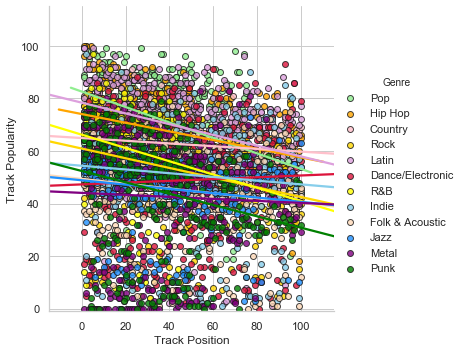

In [145]:
#pop_df = merge.groupby(['Genre'])
#pop_df = pop_df.get_group('Jazz') 

color_dict = dict({'Country': "Pink",
                   'Dance/Electronic': "Crimson",
                   'Folk & Acoustic': "Peachpuff",
                   'Hip Hop': "Orange",
                   'Indie': "skyblue",
                   'Jazz': "dodgerblue",
                   'Latin': "plum",
                   'Metal': "purple",
                   'Pop': "lightgreen",
                   'Punk': "green",
                   'R&B': "yellow",
                   'Rock': "gold"
                  })

# basic scatterplot
sns.set_style('whitegrid') 
fig = sns.lmplot( x="Track Position", y="Track Popularity", hue="Genre", data=merge, palette=color_dict, fit_reg=True, ci=None,scatter_kws={'edgecolors':'k'})
#sns.regplot(x="Track Popularity", y="Track Position", data=merge)
plt.ylim(-1, 115)
plt.xlim(-15, 115)

plt.show()

fig.savefig("output_Track_Position_Popularity.png")

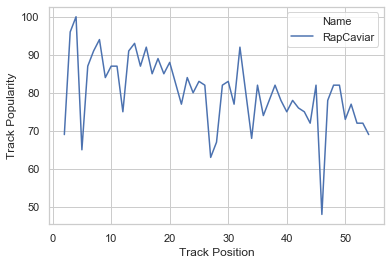

In [151]:
play_df = merge.groupby(['Playlist ID'])
play_df = play_df.get_group('37i9dQZF1DX0XUsuxWHRQd')
#pop_mean = merge.groupby(['Playlist ID'])

# basic scatterplot
#sns.lmplot( x="Track Position", y="Track Popularity", hue="Genre", data=play_df, palette=color_dict, fit_reg=False)
snsplot=sns.lineplot(x='Track Position', y='Track Popularity', hue='Name', data=play_df)
fig=snsplot.get_figure()
fig.savefig("output_rap_caviar_playlist_spot_popularity.png")

In [112]:
# group by Team, get mean, min, and max value of Age for each value of Team.
#Genre_avg = merge.groupby('Genre').agg({['Track Popularity','Danceability','Energy','Instrumentalness','Liveness','Loudness','Speechiness','Valence','Tempo'] ['mean']})
Genre_avg = merge.groupby('Genre')
Genre_avg = Genre_avg.mean()
Genre_avg = Genre_avg.reset_index()
Genre_avg


,Genre,Track Position,Track Popularity,Track Duration,Available Markets,Key,Mode,Time Signature,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Valence,Tempo
0,Country,35.503106,63.080745,207237.372671,65.506211,5.804348,0.913043,3.968944,0.201557,0.583882,0.704230,0.001031,0.163666,-5.943220,0.041309,0.569488,125.542506
1,Dance/Electronic,45.861991,48.837104,204832.278281,66.386878,5.624434,0.558824,3.977376,0.059695,0.617081,0.849557,0.150232,0.241387,-4.805857,0.088107,0.390237,128.054597
2,Folk & Acoustic,47.722222,45.024444,229333.937778,62.824444,5.302222,0.820000,3.877778,0.586162,0.516551,0.422689,0.069101,0.136721,-10.010244,0.038678,0.377156,114.417518
3,Hip Hop,40.002874,67.442529,188892.408046,71.574713,5.471264,0.517241,3.985632,0.118548,0.794474,0.626580,0.003910,0.180155,-6.827986,0.250510,0.530718,125.704626
4,Indie,48.101911,50.966030,214399.966030,63.437367,5.556263,0.740977,3.940552,0.343009,0.606599,0.563861,0.140280,0.169595,-8.124008,0.051540,0.498150,117.805318
5,Jazz,36.712121,45.830303,332172.260606,67.042424,5.193939,0.518182,3.830303,0.753464,0.505955,0.281639,0.494925,0.161830,-15.233752,0.050121,0.327594,106.047397
6,Latin,44.625000,69.250000,225166.995000,70.695000,5.425000,0.582500,4.002500,0.256377,0.752827,0.717338,0.001648,0.163262,-4.980825,0.094699,0.717717,124.456610
7,Metal,37.863636,42.610795,246316.517045,59.937500,4.997159,0.576705,3.928977,0.012905,0.447503,0.903673,0.081724,0.213736,-5.275514,0.096681,0.370978,128.374315
8,Pop,38.943243,71.140541,192946.464865,70.370270,5.591892,0.645946,3.981081,0.282369,0.666768,0.586807,0.013220,0.165358,-6.783805,0.095326,0.471537,116.342000
9,Punk,36.111455,44.591331,200122.520124,60.882353,5.219814,0.736842,3.953560,0.034675,0.461310,0.872833,0.037086,0.210012,-5.055217,0.078007,0.507095,134.938734


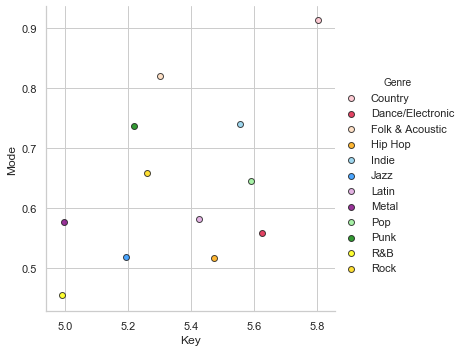

In [113]:
# basic scatterplot
sns.set_style('whitegrid') 
sns.lmplot( x="Key", y="Mode", hue="Genre", data=Genre_avg, palette=color_dict, fit_reg=False, scatter_kws={'edgecolors':'k'})
#sns.regplot(x="Track Popularity", y="Track Position", data=merge)
plt.show()

In [114]:
gen_play = merge.groupby(['Genre', 'Playlist ID']).mean()
gen_play = gen_play.reset_index()
gen_play

,Genre,Playlist ID,Track Position,Track Popularity,Track Duration,Available Markets,Key,Mode,Time Signature,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Valence,Tempo
0,Country,37i9dQZF1DWTkxQvqMy4WW,25.500000,66.740000,215384.700000,66.480000,6.320000,0.920000,3.980000,0.183917,0.567900,0.732720,0.001033,0.168644,-5.497020,0.045926,0.532760,123.880320
1,Country,37i9dQZF1DWVpjAJGB70vU,29.000000,58.245614,212436.877193,65.543860,5.526316,0.929825,3.982456,0.274098,0.653000,0.673175,0.001717,0.190930,-8.066842,0.035100,0.690684,127.045404
2,Country,37i9dQZF1DX1lVhptIYRda,26.500000,66.884615,192617.442308,62.192308,5.807692,0.942308,3.980769,0.212402,0.568692,0.698500,0.000055,0.153838,-5.253173,0.041925,0.538423,125.906404
3,Country,37i9dQZF1DX8S0uQvJ4gaa,32.952381,56.222222,191268.634921,77.476190,5.698413,0.825397,3.984127,0.169045,0.565492,0.703032,0.000201,0.153954,-5.614381,0.042656,0.538492,129.292365
4,Country,37i9dQZF1DXaB64wwvEuUo,50.500000,66.350000,217862.660000,59.180000,5.770000,0.940000,3.940000,0.183872,0.571960,0.711420,0.001670,0.156866,-5.521850,0.041371,0.554451,122.965310
5,Dance/Electronic,37i9dQZF1DWSf2RDTDayIx,40.500000,52.012500,194526.187500,63.575000,5.025000,0.750000,3.987500,0.076796,0.624162,0.839187,0.110736,0.253312,-4.938575,0.064771,0.435468,123.980050
6,Dance/Electronic,37i9dQZF1DX0BcQWzuB7ZO,50.500000,56.680000,205753.510000,57.120000,5.540000,0.570000,3.990000,0.098512,0.637400,0.795220,0.020656,0.174484,-4.826070,0.061224,0.424020,123.276000
7,Dance/Electronic,37i9dQZF1DX4dyzvuaRJ0n,49.500000,56.367347,202553.948980,66.153061,6.469388,0.469388,3.938776,0.048196,0.641796,0.832469,0.110755,0.195681,-5.129031,0.059651,0.425547,122.849031
8,Dance/Electronic,37i9dQZF1DX4eRPd9frC1m,50.500000,47.440000,194012.220000,70.300000,4.880000,0.620000,3.990000,0.049204,0.660910,0.883920,0.112736,0.289251,-3.624680,0.173997,0.397000,136.289610
9,Dance/Electronic,37i9dQZF1DX91oIci4su1D,32.500000,23.265625,236670.500000,78.625000,6.375000,0.343750,3.984375,0.011670,0.470156,0.919891,0.521103,0.326216,-5.959109,0.068652,0.216280,135.718156


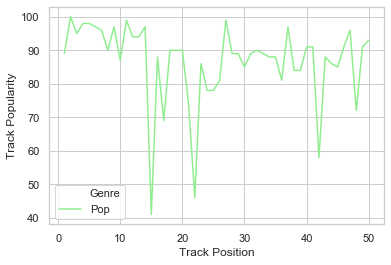

In [115]:
#sns.lmplot( x="Track Position", y="Track Popularity", hue="Genre", data=play_df, palette=color_dict, fit_reg=False)
sns.lineplot(x='Track Position', y='Track Popularity', hue='Genre', data=play_df, palette=color_dict)
plt.show()

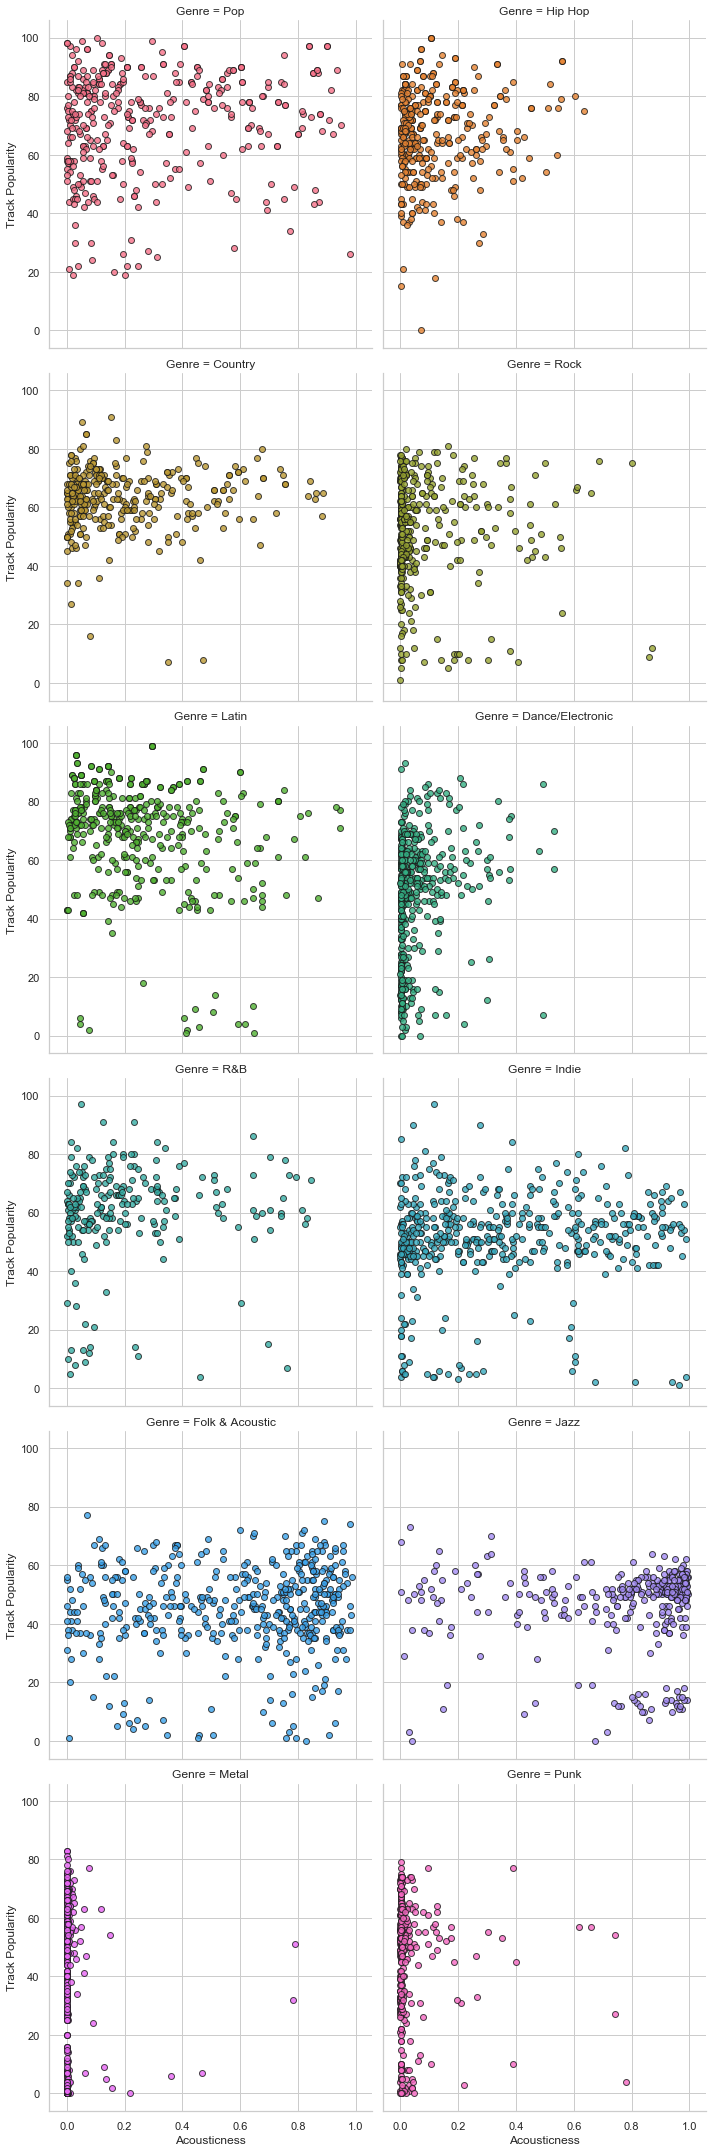

In [116]:
filtered_class = merge[merge['Genre']!='Null']
fig = sns.lmplot("Acousticness", "Track Popularity", data=filtered_class, hue="Genre", fit_reg=False, col='Genre', col_wrap=2, scatter_kws={'edgecolors':'k'})
fig.savefig("output_Acousticness_Popularity.png")

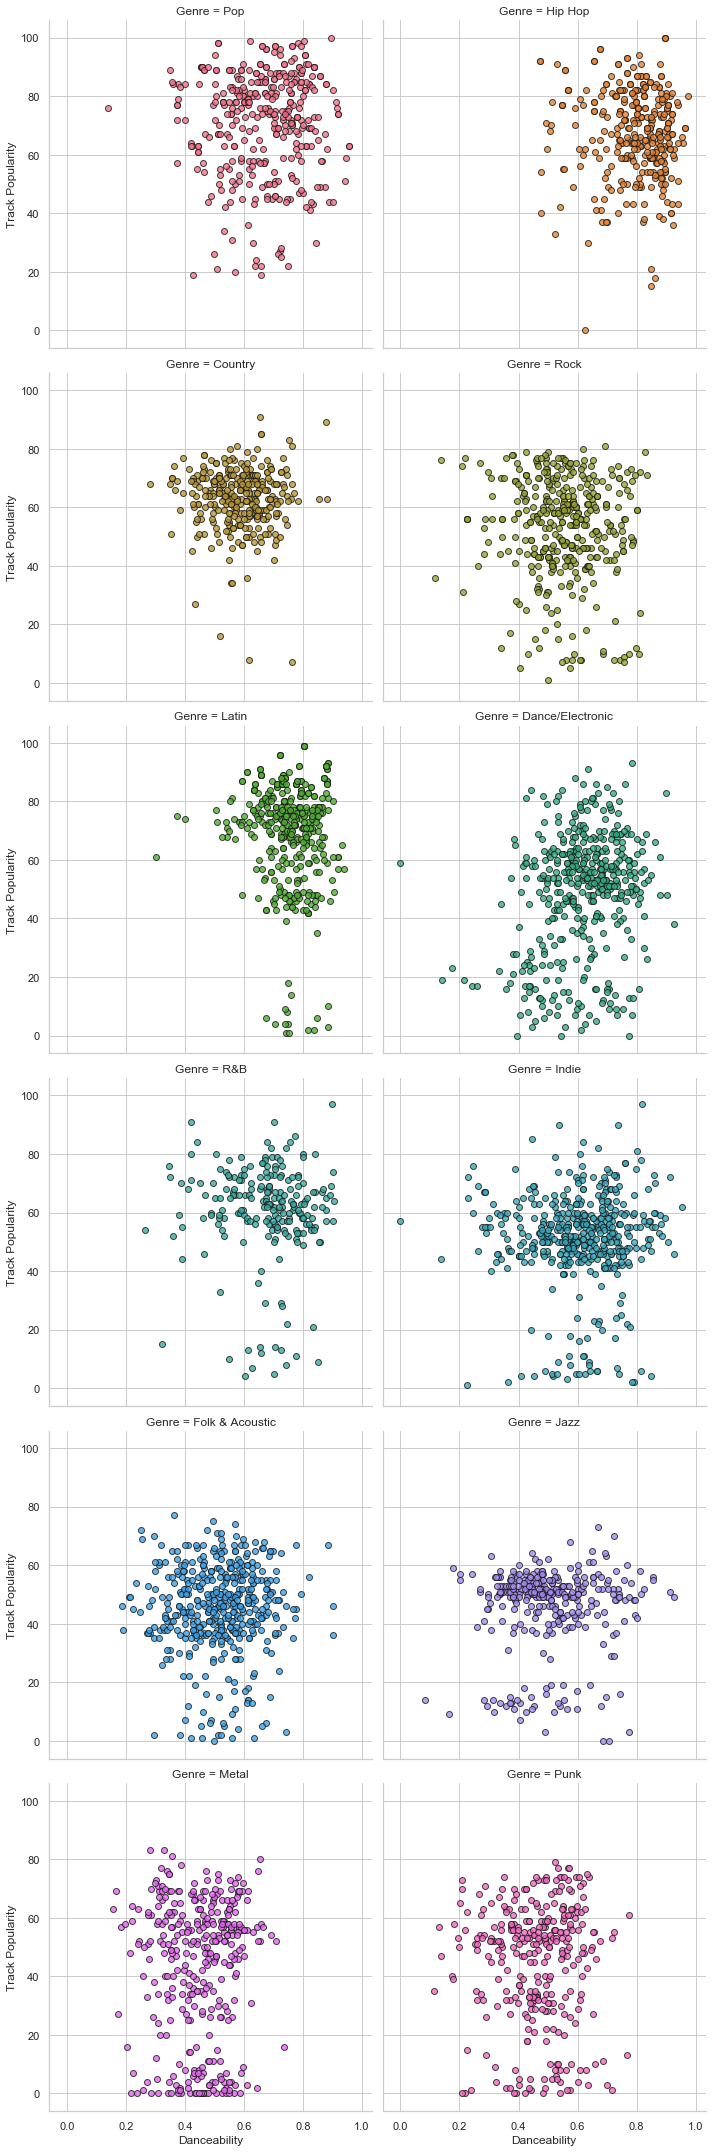

In [117]:
filtered_class = merge[merge['Genre']!='Null']
fig = sns.lmplot("Danceability", "Track Popularity", data=filtered_class, hue="Genre", fit_reg=False, col='Genre', col_wrap=2, scatter_kws={'edgecolors':'k'})
fig.savefig("output_Danceability_Popularity.png")

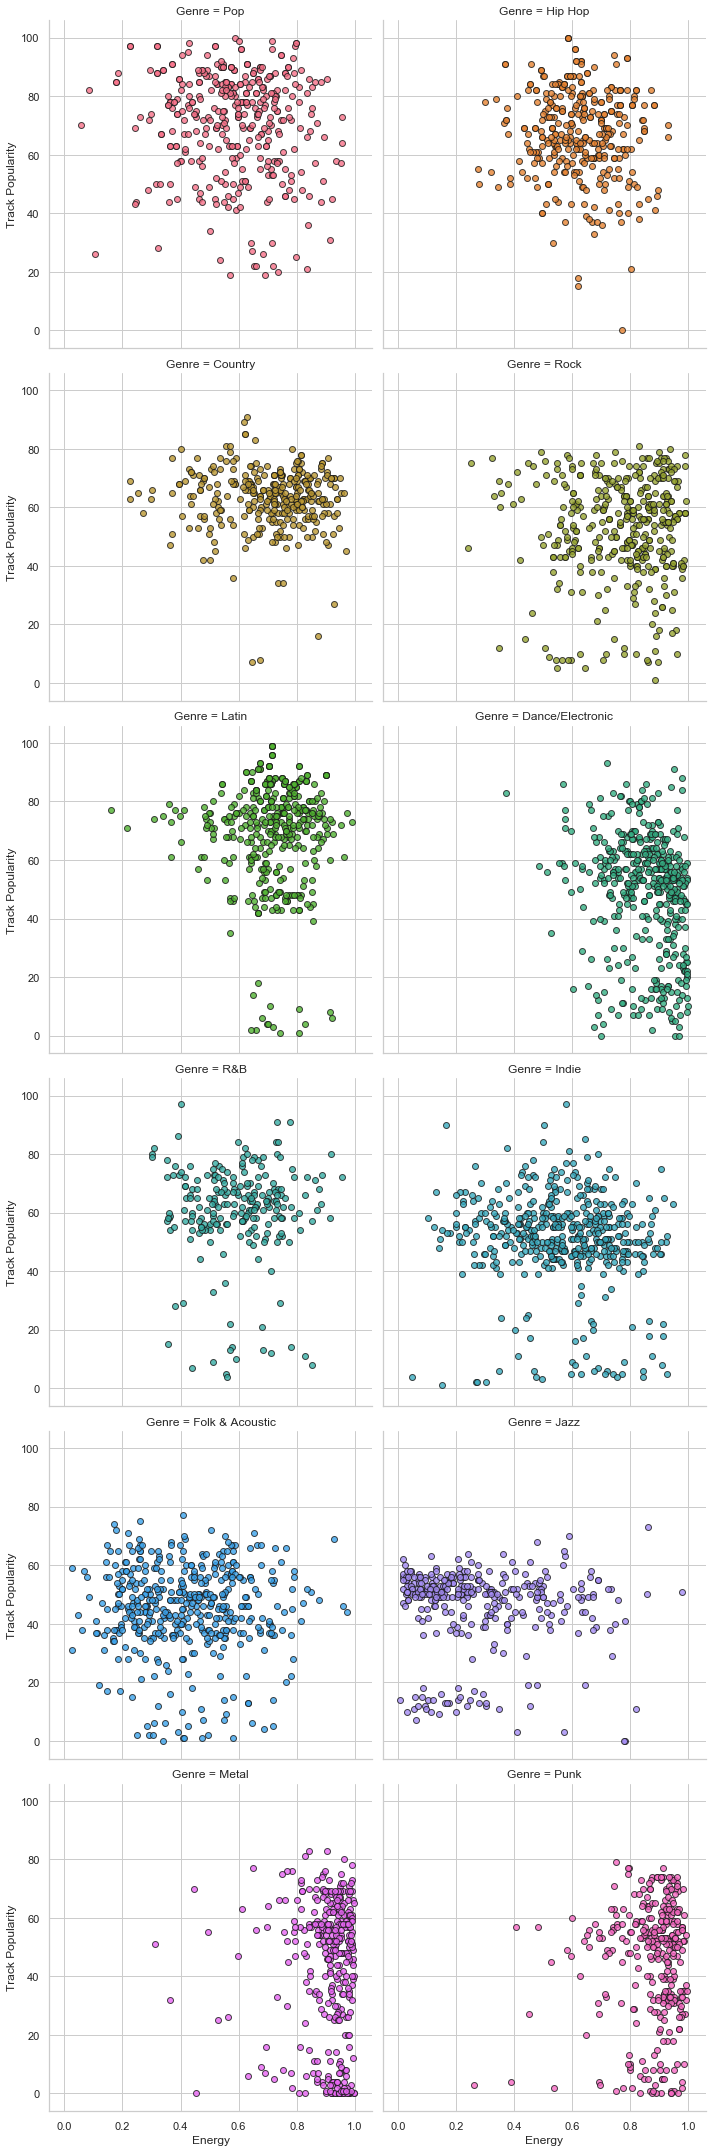

In [118]:
filtered_class = merge[merge['Genre']!='Null']
fig = sns.lmplot("Energy", "Track Popularity", data=filtered_class, hue="Genre", fit_reg=False, col='Genre', col_wrap=2, scatter_kws={'edgecolors':'k'})
fig.savefig("output_Energy_Popularity.png")

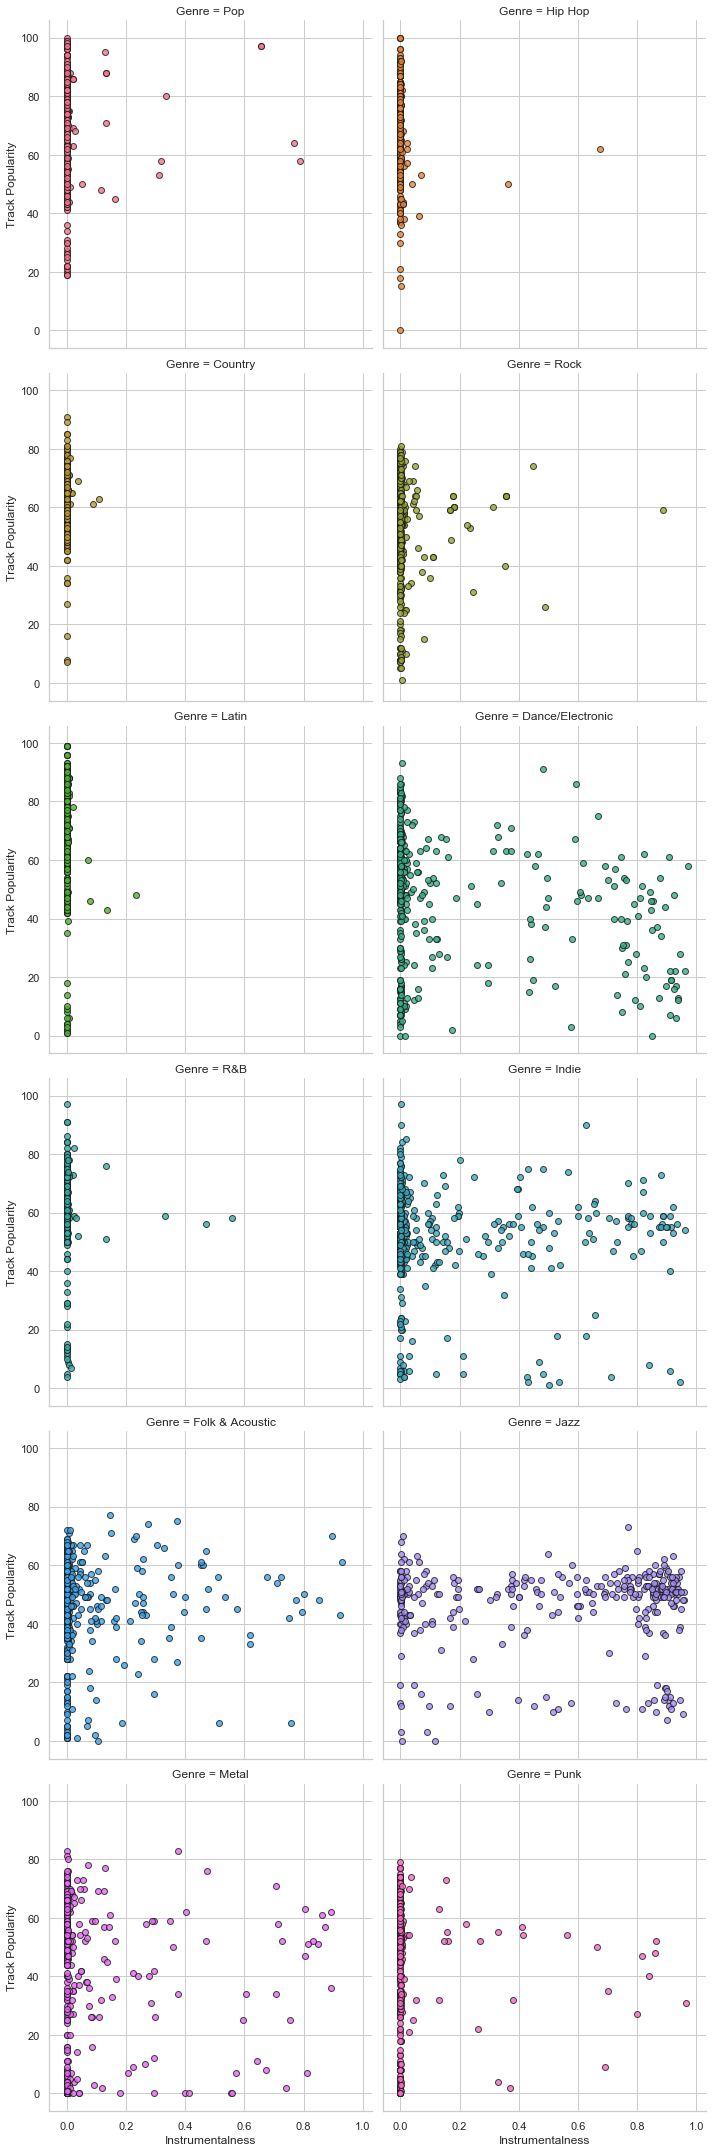

In [119]:

filtered_class = merge[merge['Genre']!='Null']
fig = sns.lmplot("Instrumentalness", "Track Popularity", data=filtered_class, hue="Genre", fit_reg=False, col='Genre', col_wrap=2, scatter_kws={'edgecolors':'k'})
fig.savefig("output_Instrumentalness_Popularity.png")

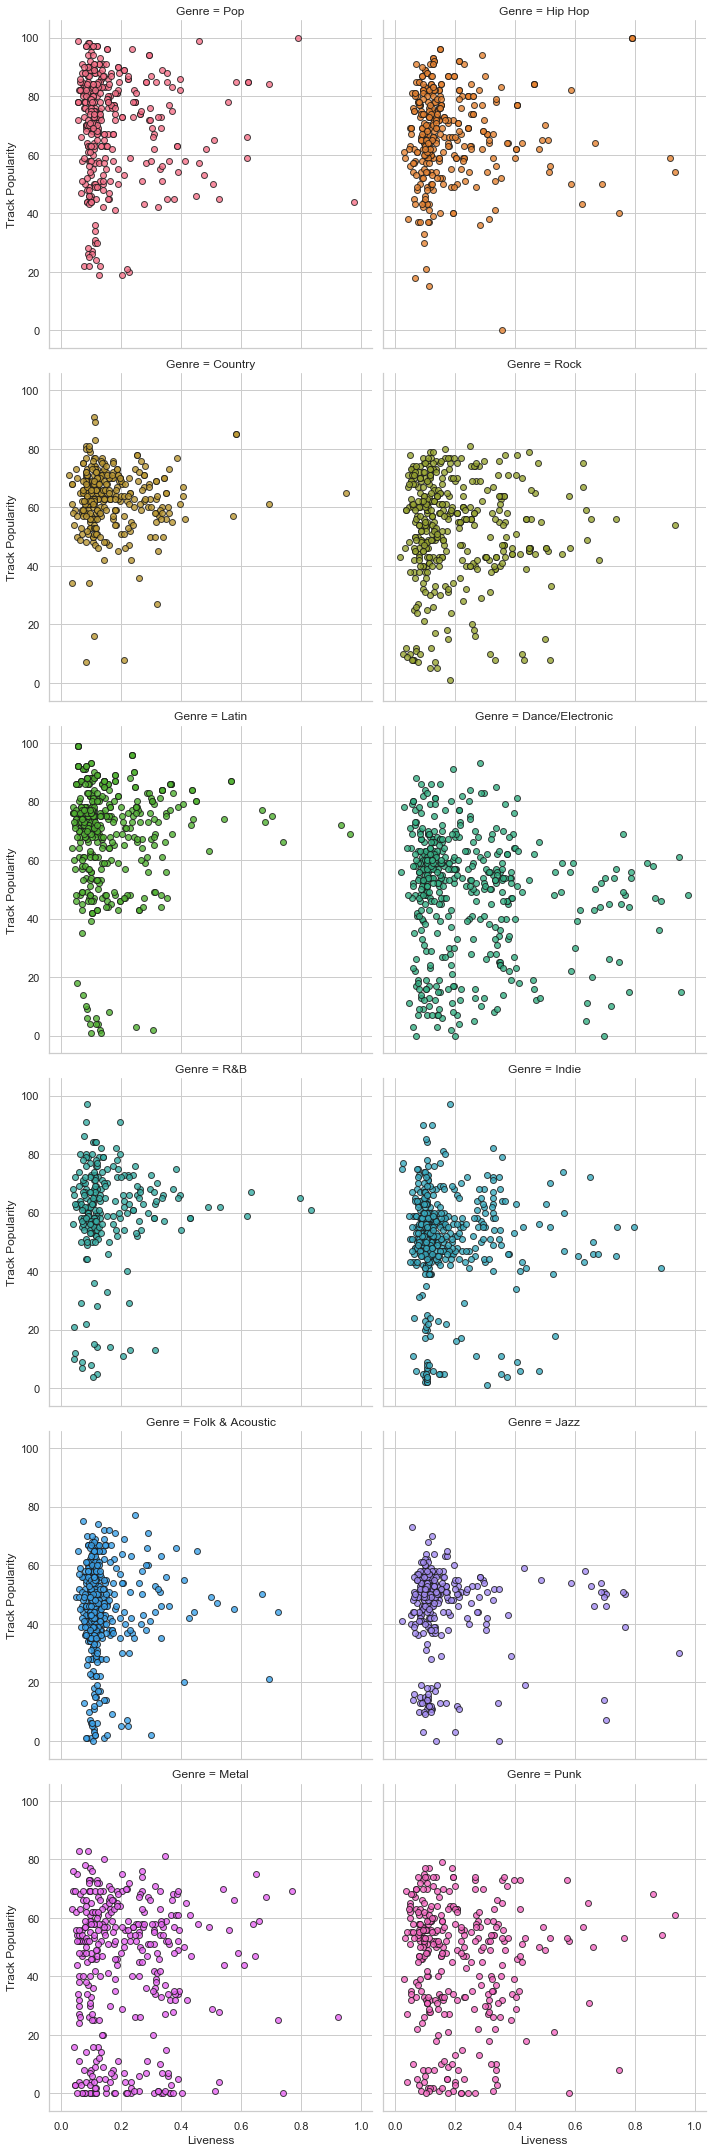

In [120]:
filtered_class = merge[merge['Genre']!='Null']
fig = sns.lmplot("Liveness", "Track Popularity", data=filtered_class, hue="Genre", fit_reg=False, col='Genre', col_wrap=2, scatter_kws={'edgecolors':'k'})
fig.savefig("output_Liveness_Popularity.png")

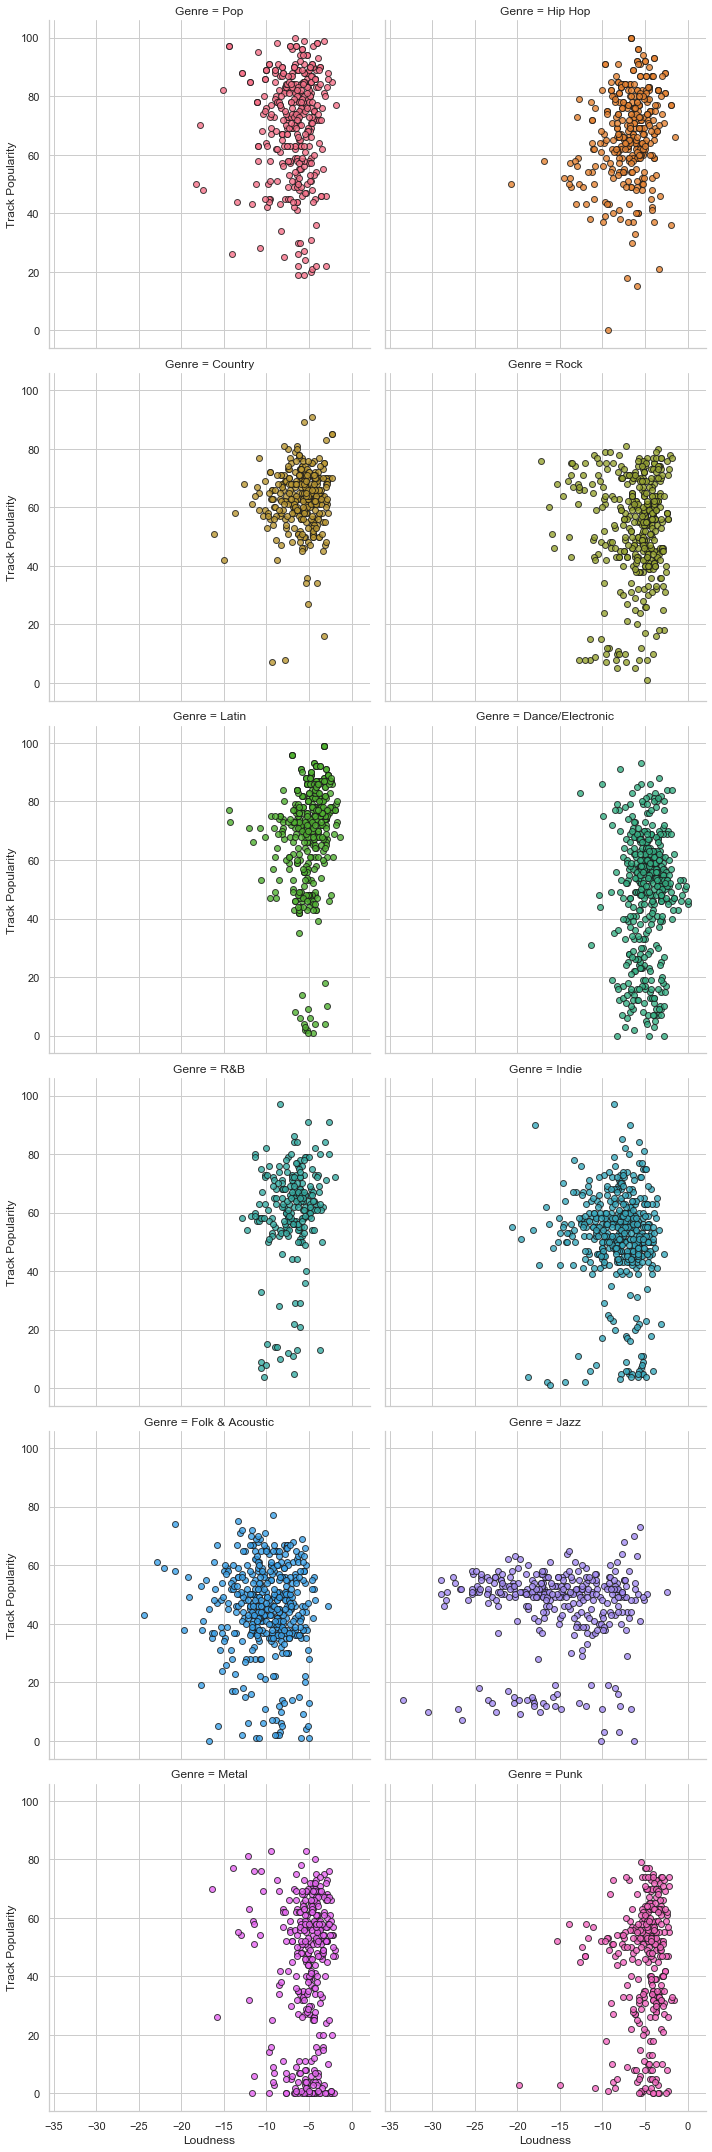

In [121]:
filtered_class = merge[merge['Genre']!='Null']
fig = sns.lmplot("Loudness", "Track Popularity", data=filtered_class, hue="Genre", fit_reg=False, col='Genre', col_wrap=2, scatter_kws={'edgecolors':'k'})
fig.savefig("output_Loudness_Popularity.png")

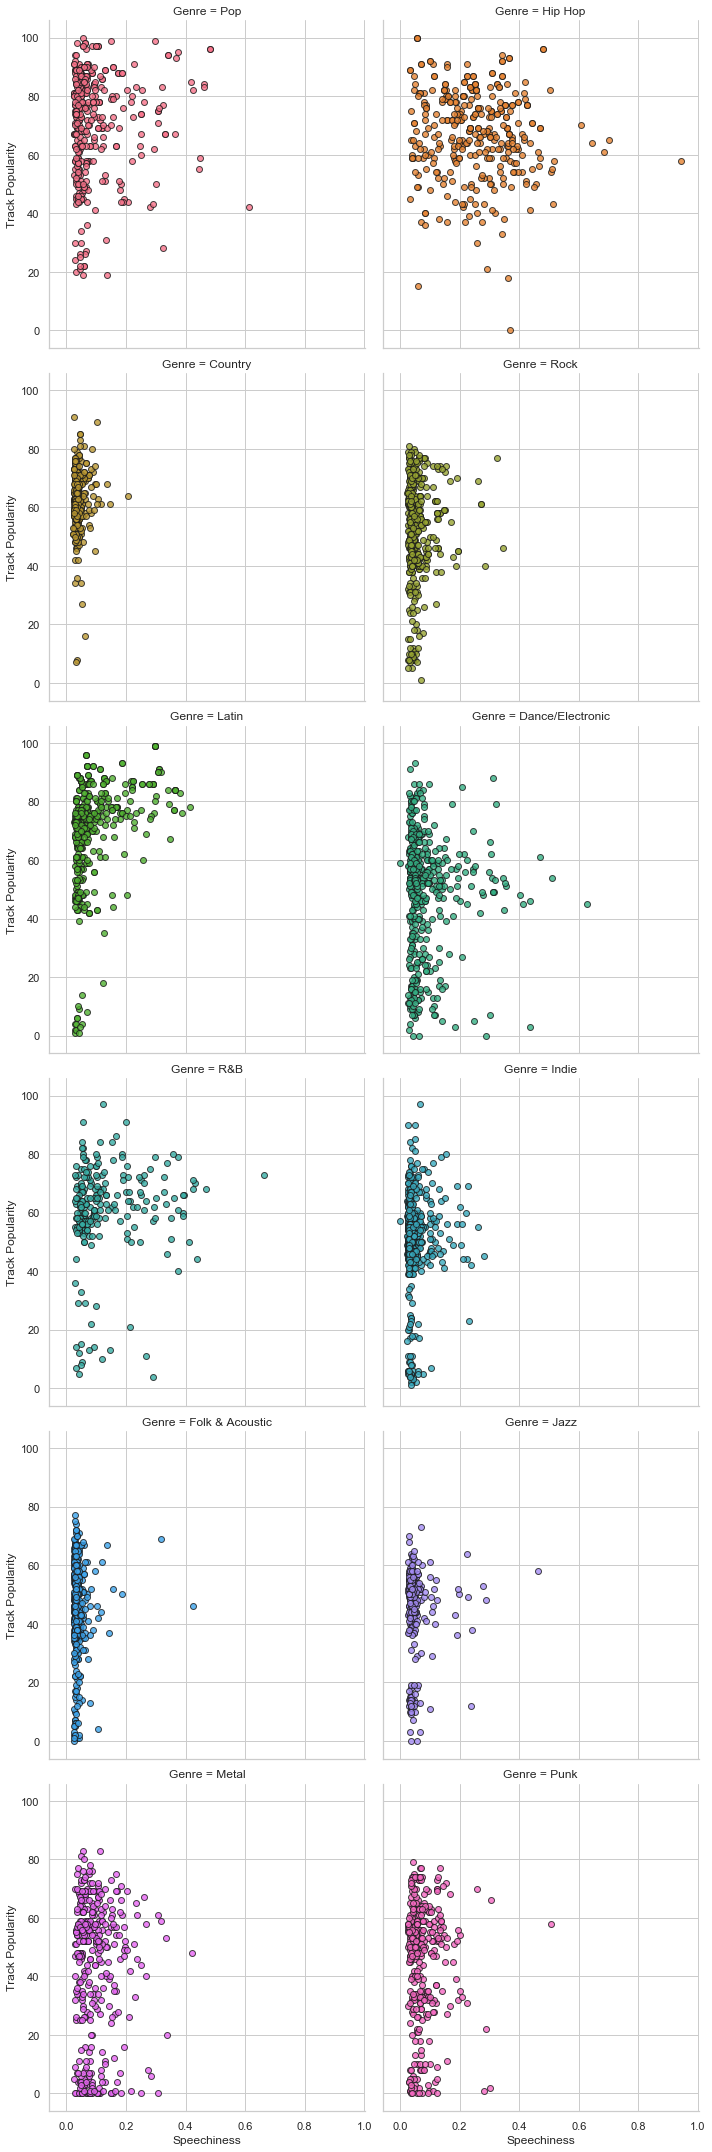

In [122]:
filtered_class = merge[merge['Genre']!='Null']
fig = sns.lmplot("Speechiness", "Track Popularity", data=filtered_class, hue="Genre", fit_reg=False, col='Genre', col_wrap=2, scatter_kws={'edgecolors':'k'})
fig.savefig("output_Speechiness_Popularity.png")

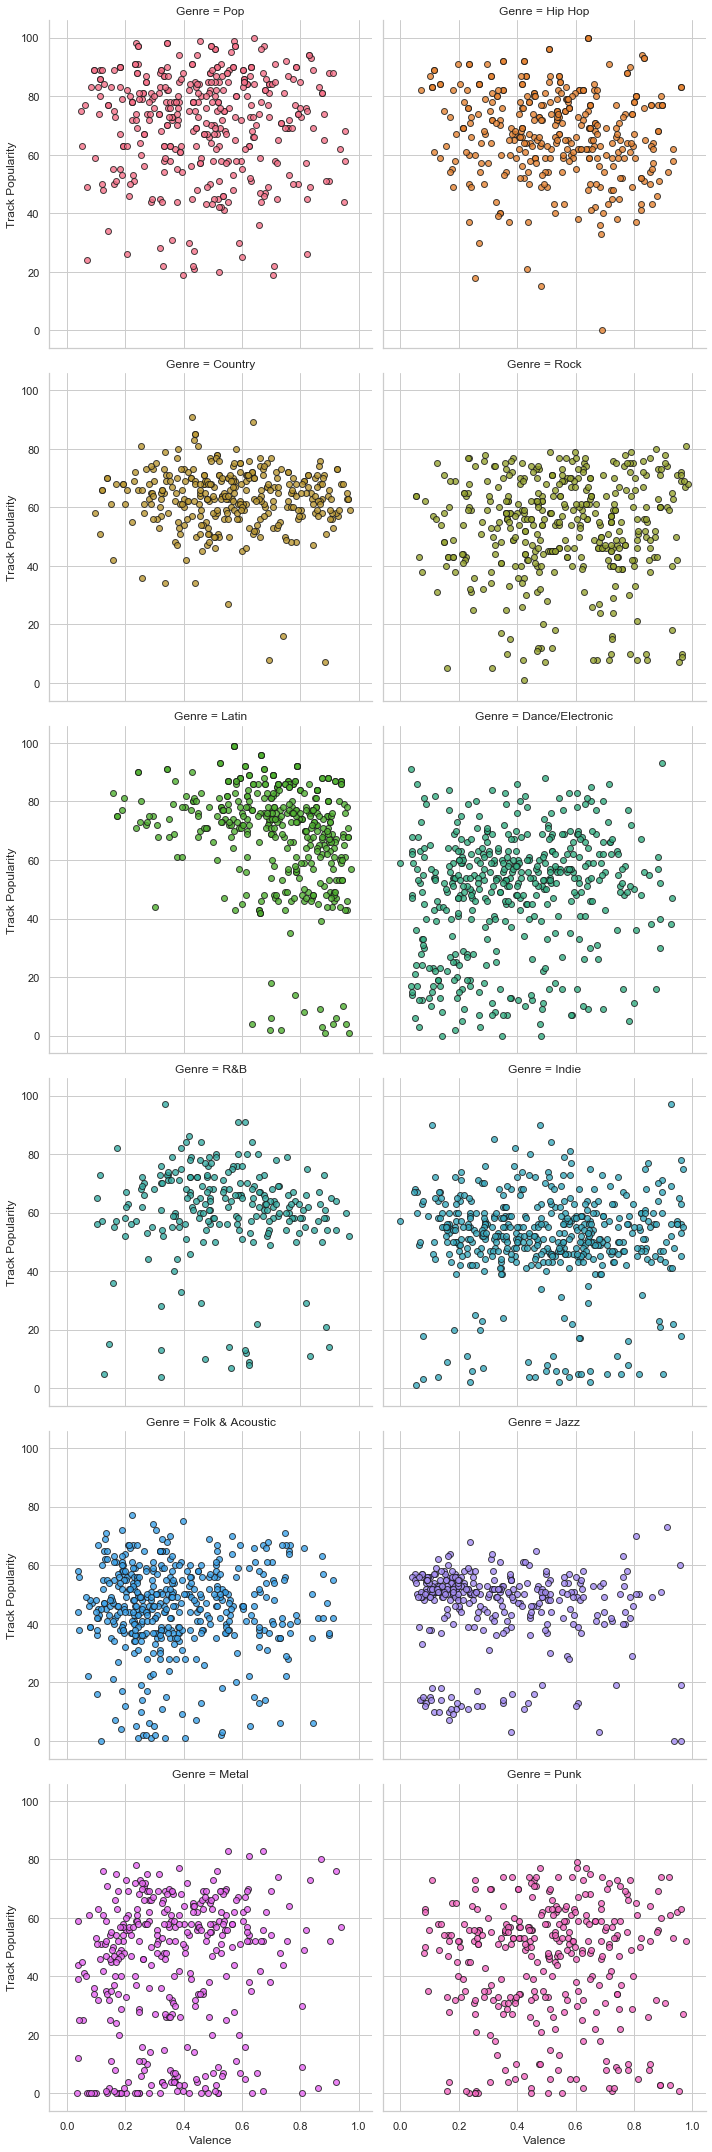

In [123]:
filtered_class = merge[merge['Genre']!='Null']
fig = sns.lmplot("Valence", "Track Popularity", data=filtered_class, hue="Genre", fit_reg=False, col='Genre', col_wrap=2, scatter_kws={'edgecolors':'k'})
fig.savefig("output_Valence_Popularity.png")

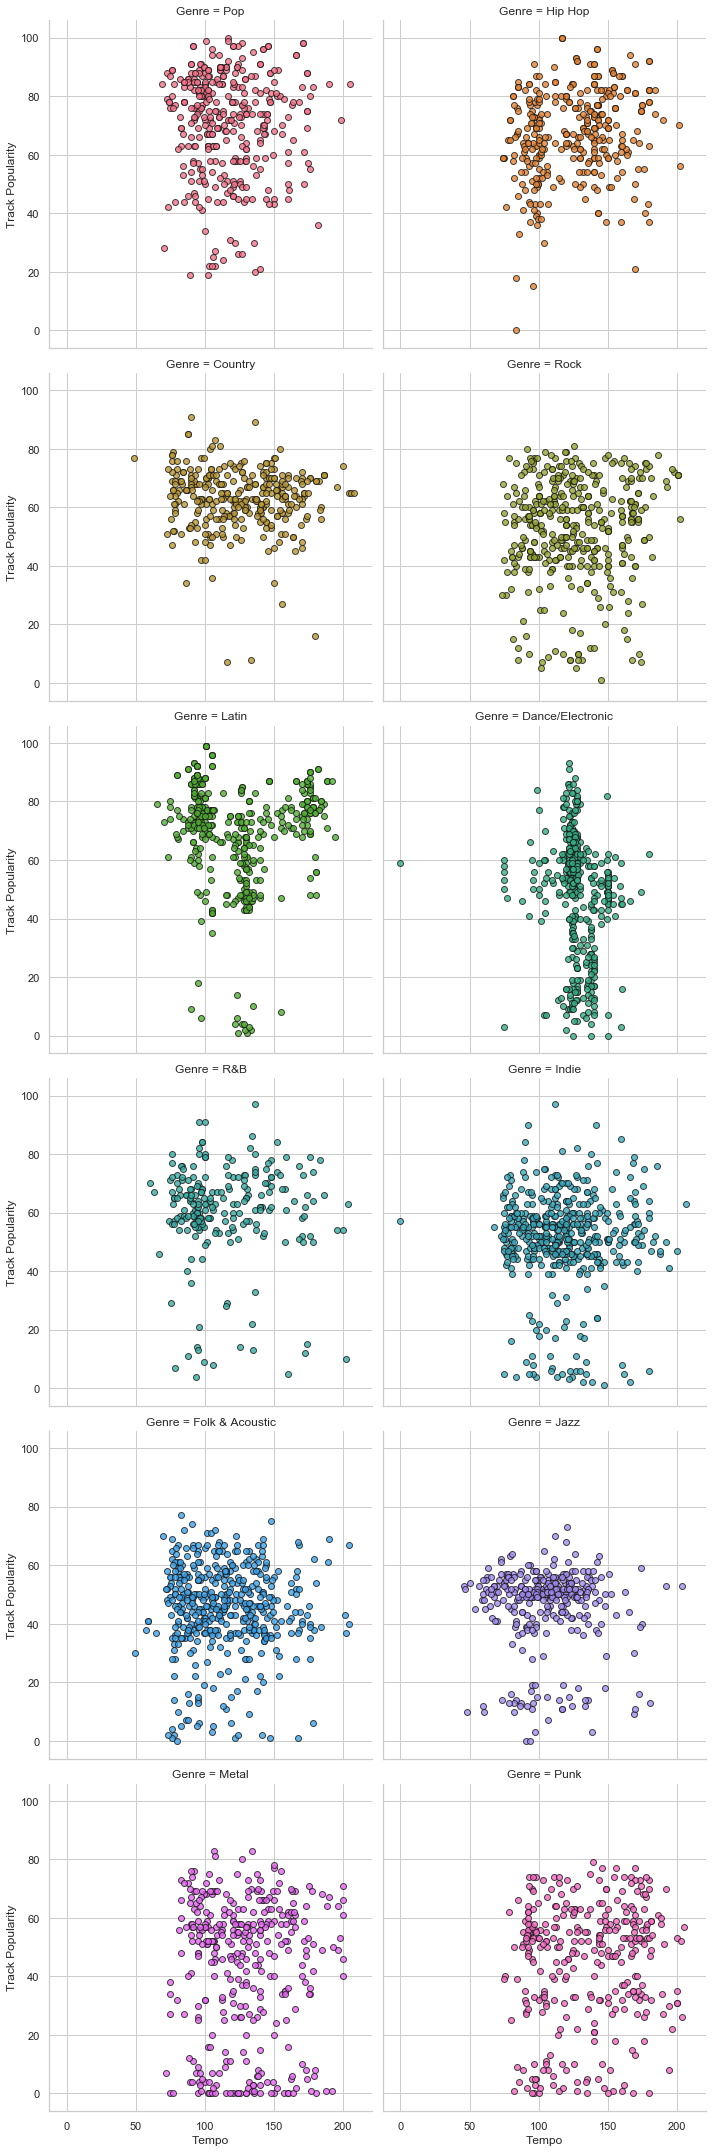

In [124]:
filtered_class = merge[merge['Genre']!='Null']
fig = sns.lmplot("Tempo", "Track Popularity", data=filtered_class, hue="Genre", fit_reg=False, col='Genre', col_wrap=2, scatter_kws={'edgecolors':'k'})
fig.savefig("output_Tempo_Popularity.png")

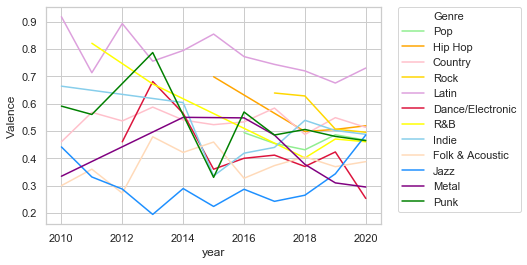

In [125]:
merge['year'] = pd.DatetimeIndex(merge['Release Date']).year
#DataFrame to filter only the Northern Hemisphere
merge = merge[(merge["year"] >= 2010)]
merge.head()
#filtered_class = merge[merge['Genre']!='Null']
#fig = sns.lmplot("year", "Valence", data=merge, hue="Genre", fit_reg=False, col='Genre', col_wrap=2)
#fig.savefig("output_Valence_Release Date.png")

# basic scatterplot
#sns.lmplot( x="Track Position", y="Track Popularity", hue="Genre", data=play_df, palette=color_dict, fit_reg=False)
sns.lineplot(x='year', y='Valence', hue='Genre', data=merge, palette=color_dict,err_style=None)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

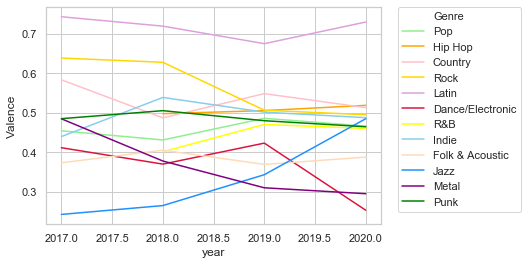

In [126]:
merge = merge[(merge["year"] >= 2017)]
merge.head()
#filtered_class = merge[merge['Genre']!='Null']
#fig = sns.lmplot("year", "Valence", data=merge, hue="Genre", fit_reg=False, col='Genre', col_wrap=2)
#fig.savefig("output_Valence_Release Date.png")

# basic scatterplot
#sns.lmplot( x="Track Position", y="Track Popularity", hue="Genre", data=play_df, palette=color_dict, fit_reg=False)
sns.lineplot(x='year', y='Valence', hue='Genre', data=merge, palette=color_dict,err_style=None)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

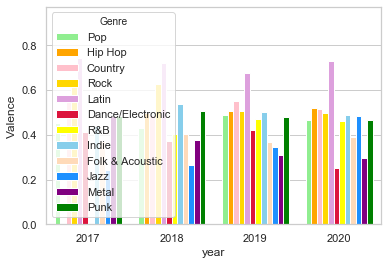

In [85]:
#Here in case we decide to do a bar chart instead of line plot

#merge['year'] = pd.DatetimeIndex(merge['Release Date']).year
#DataFrame to filter only the Northern Hemisphere
#merge = merge[(merge["year"] >= 2010)]
#merge.head()

#sns.set(style="whitegrid")

# Draw a nested barplot to show survival for class and sex
#g = sns.barplot(x = 'year', y = 'Valence', hue = 'Genre', data = merge,
#            palette = color_dict,
#            capsize = 0.05,             
#            saturation = 8,             
#            errwidth = 0,  
#            ci = 'sd'   
#            )
#(x="year", y="Valence", hue="Genre", data=merge, height=6, kind="bar", palette=color_dict)


#g.despine(left=True)
#g.set_ylabels("Valence")